<a href="https://colab.research.google.com/github/ge43jef/GEEHYDRO/blob/Final/Randomforest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from glob import glob

files = glob('FLX*')

dataframes = []

columns = ["SW_IN_F","LW_IN_F", "PA_F", "WS_F", "VPD_F", "temperature_2m", "total_precipitation_sum", "LE_CORR"]

for file in files:
    df = pd.read_excel(file, usecols=columns, header=0)
    dataframes.append(df)

combined_df = pd.concat(dataframes, ignore_index=True)
count_9999 = (combined_df["LE_CORR"] == -9999).sum()
print("Number of values with -9999 in LE_CORR:", count_9999)
combined_df = combined_df[combined_df["LE_CORR"] != -9999]
combined_df.shape
X = combined_df.drop("LE_CORR", axis=1)
y = combined_df["LE_CORR"].values.reshape(-1, 1)

print(type(X))

Number of values with -9999 in LE_CORR: 121
<class 'pandas.core.frame.DataFrame'>


In [2]:
from sklearn.preprocessing import MinMaxScaler

# Create an instance of StandardScaler
scaler = MinMaxScaler()

# Scale the X DataFrame
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
#y = y.reshape(len(y), 1)
y = scaler.fit_transform(y)
print(type(y))

<class 'numpy.ndarray'>


### **Decision Tree and Random forest**

In [3]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold


In [25]:
import numpy as np
kf = KFold(n_splits=5)
for train, test in kf.split(X):
    X_train, X_test, y_train, y_test = np.array(X)[train], np.array(X)[test], np.array(y)[train], np.array(y)[test]
    y_train = y_train.ravel()
    y_test = y_test.ravel()
    tree1 = DecisionTreeRegressor(max_depth=10)
    tree2 = RandomForestRegressor(max_depth=8)
    tree1.fit(X_train, y_train)
    tree2.fit(X_train, y_train)
    y_pred1 = tree1.predict(X_test)
    y_pred2 = tree2.predict(X_test)

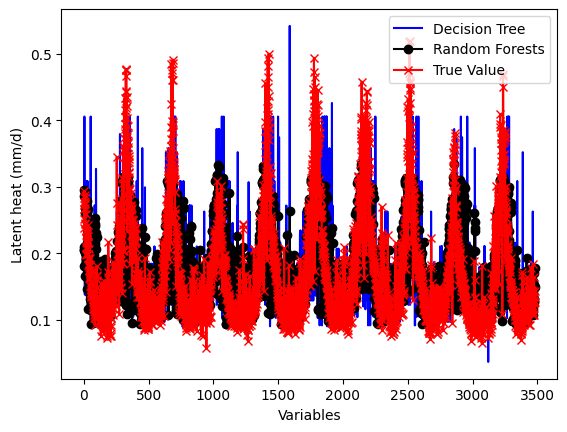

In [26]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
line = ax.plot( y_pred1, c='b',label='Decision Tree')
plt.plot( y_pred2, marker='o', c='black',label='Random Forests')
plt.plot( y_test, marker='x', c='r',label='True Value')
# Set the y-axis label
plt.ylabel('Latent heat (mm/d)')
# Set the x-axis label
plt.xlabel('Variables')
plt.legend()
plt.show()

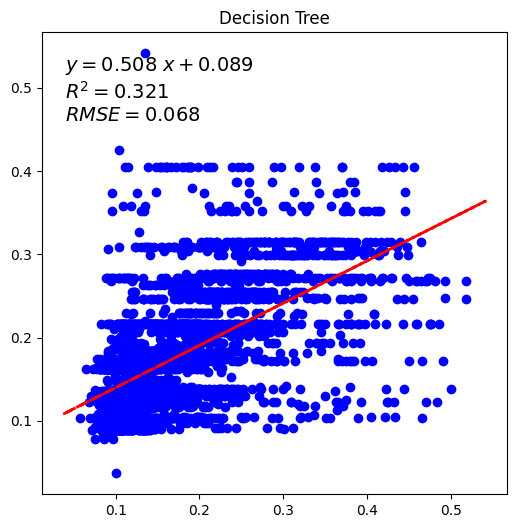

In [36]:
fig,ax=plt.subplots(1, 1, figsize=(6, 6), sharey=True)
ax.scatter( y_test , y_pred1, c='b')
z = np.polyfit(y_test , y_pred1, 1)
y_hat = np.poly1d(z)(y_pred1)
plt.plot(y_pred1, y_hat, "r--", lw=2)
text = f"$y={z[0]:0.3f}\;x{z[1]:+0.3f}$\n$R^2 = {r2_score(y_test, y_hat):0.3f}$\n" \
                   f"$RMSE = {mean_squared_error(y_test, y_hat, squared=False):0.3f} $ "
plt.gca().text(0.05, 0.95, text, transform=plt.gca().transAxes,
                           fontsize=14, verticalalignment='top')
plt.title('Decision Tree')
plt.show()

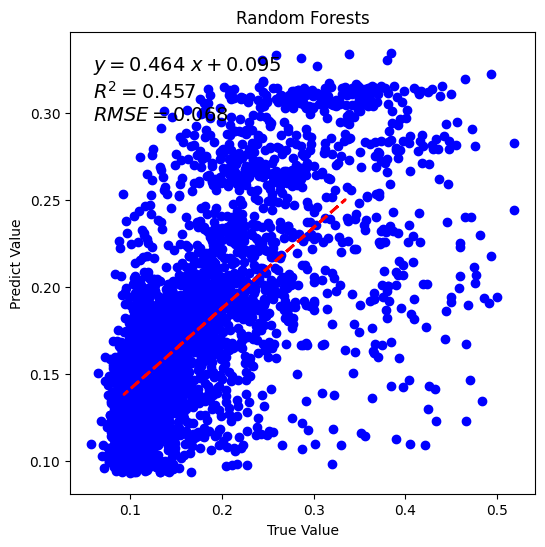

In [34]:
fig,ax=plt.subplots(1, 1, figsize=(6, 6), sharey=True)
ax.scatter( y_test , y_pred2, c='b')
z = np.polyfit(y_test , y_pred2, 1)
y_hat = np.poly1d(z)(y_pred2)
plt.plot(y_pred2, y_hat, "r--", lw=2)
text = f"$y={z[0]:0.3f}\;x{z[1]:+0.3f} $\n$R^2 = {r2_score(y_test, y_pred2):0.3f}$\n" \
                   f"$RMSE = {mean_squared_error(y_test, y_hat, squared=False):0.3f} $ "
plt.gca().text(0.05, 0.95, text, transform=plt.gca().transAxes,
                           fontsize=14, verticalalignment='top')
plt.ylabel('Predict Value')
# Set the x-axis label
plt.xlabel('True Value')
plt.title('Random Forests')
plt.show()

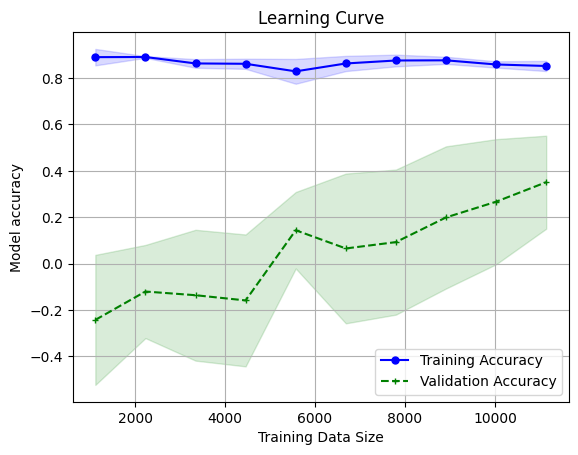

In [32]:
from sklearn.model_selection import learning_curve, validation_curve
train_sizes, train_scores, test_scores = learning_curve(estimator=tree1, X=X_train, y=y_train,
                                                       cv=5, train_sizes=np.linspace(0.1, 1.0, 10))
#
# Calculate training and test mean and std
#
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.show()